In [2]:
import pandas as pd
import numpy as np
import gzip
import shutil
import time 
import matplotlib.pyplot as plt

In [2]:
# Take in BAM
bam = ('Genetic-Variation/project/testdata/bam/HG00154.mapped.ILLUMINA.bwa.GBR.low_coverage.20101123.bam')
with open (bam) as fh:
    print(bam)

Genetic-Variation/project/testdata/bam/HG00154.mapped.ILLUMINA.bwa.GBR.low_coverage.20101123.bam


In [3]:
# Take in FASTQ 
fastq= ('Genetic-Variation/project/testdata/fastq/SP1.fq')
with open (fastq) as fh:
    print(fh)

<_io.TextIOWrapper name='Genetic-Variation/project/testdata/fastq/SP1.fq' mode='r' encoding='UTF-8'>


In [2]:
vcf = ('Genetic-Variation/project/testdata/vcf/chr22_test.vcf.gz')


In [4]:
# Take in VCF
vcf = ('Genetic-Variation/project/testdata/vcf/chr22_test.vcf.gz')
with gzip.open (vcf,'rb') as f_in:
    print(fh)
    with open(vcf[:-3], 'wb') as f_out: 
        shutil.copyfileobj(f_in, f_out)

<_io.TextIOWrapper name='Genetic-Variation/project/testdata/fastq/SP1.fq' mode='r' encoding='UTF-8'>


In [5]:
# Non Testing VCF's
ch21=('/datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr22.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz')
ch20= ('datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr20.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz')

In [35]:
# Take in VCF
with gzip.open (ch20,'rb') as f_in:
    with open(ch20[:-3], 'wb') as f_out: 
        shutil.copyfileobj(f_in, f_out)

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr20.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz'

In [28]:
!gatk MergeVcfs --INPUT ch20 ch21 --OUTPUT merger

Using GATK jar /opt/gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /opt/gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar MergeVcfs --INPUT ch20 ch21 --OUTPUT merger
USAGE: MergeVcfs [arguments]

<p>Combines multiple variant files into a single variant file.</p><h3>Inputs</h3><ul>      <li>One or more input file in
VCF format (can be gzipped, i.e. ending in ".vcf.gz", or binary compressed, i.e. ending in ".bcf").</li>     
<li>Optionally a sequence dictionary file (typically name ending in .dict) if the input VCF does not contain a         
complete contig list and if the output index is to be created (true by default).</li>  </ul>  <p>  The input variant
data must adhere to the following rules:</p>     <ul>         <li>If there are samples, those must be the same across
all input files.</li>         <li>Input file head

In [5]:
# View formatting of VCF File 
amt = 10
with open ('Genetic-Variation/project/testdata/vcf/chr22_test.vcf','rb') as fh:
    for i in fh:
        print(i)
        if amt<=0:
            break
        time.sleep(0.1)
        amt -= 1

b'##fileformat=VCFv4.3\n'
b'##FILTER=<ID=PASS,Description="All filters passed">\n'
b'##fileDate=31052018_15h52m43s\n'
b'##source=IGSRpipeline\n'
b'##reference=ftp://ftp.1000genomes.ebi.ac.uk/vol1/ftp/technical/reference/GRCh38_reference_genome/GRCh38_full_analysis_set_plus_decoy_hla.fa\n'
b'##FORMAT=<ID=GT,Number=1,Type=String,Description="Phased Genotype">\n'
b'##contig=<ID=chr22>\n'
b'##INFO=<ID=AF,Number=A,Type=Float,Description="Estimated allele frequency in the range (0,1)">\n'
b'##INFO=<ID=AC,Number=A,Type=Integer,Description="Total number of alternate alleles in called genotypes">\n'
b'##INFO=<ID=NS,Number=1,Type=Integer,Description="Number of samples with data">\n'
b'##INFO=<ID=AN,Number=1,Type=Integer,Description="Total number of alleles in called genotypes">\n'


In [6]:
f_out

<_io.BufferedWriter name='Genetic-Variation/project/testdata/vcf/chr22_test.vcf'>

In [7]:
!plink2 --vcf 'Genetic-Variation/project/testdata/vcf/chr22_test.vcf' --make-bed --out chr22

PLINK v1.90p 64-bit (25 Mar 2016)          https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to chr22.log.
Options in effect:
  --make-bed
  --out chr22
  --vcf Genetic-Variation/project/testdata/vcf/chr22_test.vcf

385382 MB RAM detected; reserving 192691 MB for main workspace.
--vcf: chr22-temporary.bed + chr22-temporary.bim + chr22-temporary.fam written.
25078 variants loaded from .bim file.
2548 people (0 males, 0 females, 2548 ambiguous) loaded from .fam.
Ambiguous sex IDs written to chr22.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 2548 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
25078 variants and 2548 people pass filters and QC.
Note: No phenotypes p

In [8]:
!plink2 --bfile chr22 --freq

PLINK v1.90p 64-bit (25 Mar 2016)          https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --bfile chr22
  --freq

385382 MB RAM detected; reserving 192691 MB for main workspace.
25078 variants loaded from .bim file.
2548 people (0 males, 0 females, 2548 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 2548 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
--freq: Allele frequencies (founders only) written to plink.frq .


In [9]:
!plink2 --bfile chr22 --snps-only --maf 0.4 --make-bed --mind 0.05 --recode --out filtered

PLINK v1.90p 64-bit (25 Mar 2016)          https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to filtered.log.
Options in effect:
  --bfile chr22
  --maf 0.4
  --make-bed
  --mind 0.05
  --out filtered
  --recode
  --snps-only

385382 MB RAM detected; reserving 192691 MB for main workspace.
25078 variants loaded from .bim file.
2548 people (0 males, 0 females, 2548 ambiguous) loaded from .fam.
Ambiguous sex IDs written to filtered.nosex .
0 people removed due to missing genotype data (--mind).
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 2548 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
24708 variants removed due to minor allele threshold(s)
(--maf/--max-maf/--mac/--ma

In [10]:
%time !plink2 --bfile filtered --pca 2 

PLINK v1.90p 64-bit (25 Mar 2016)          https://www.cog-genomics.org/plink2
(C) 2005-2016 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to plink.log.
Options in effect:
  --bfile filtered
  --pca 2

385382 MB RAM detected; reserving 192691 MB for main workspace.
370 variants loaded from .bim file.
2548 people (0 males, 0 females, 2548 ambiguous) loaded from .fam.
Ambiguous sex IDs written to plink.nosex .
Using up to 79 threads (change this with --threads).
Before main variant filters, 2548 founders and 0 nonfounders present.
Calculating allele frequencies... 10111213141516171819202122232425262728293031323334353637383940414243444546474849505152535455565758596061626364656667686970717273747576777879808182838485868788899091929394959697989 done.
370 variants and 2548 people pass filters and QC.
Note: No phenotypes present.
Relationship matrix calculation complete.
[extracting eigenvalues and eigenvectors]^C

CPU times: user 12.2 s, sys: 2.49 s, total: 14.7 s
W

In [3]:
eigenval = pd.read_csv('plink.eigenval', header= None)
eigenval


,0
0,366.680
1,225.144


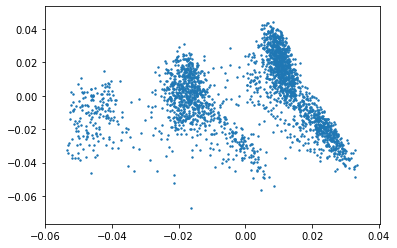

In [6]:
eigenvec = pd.read_csv('plink.eigenvec', delimiter=' ',header=None, names= ['a','b','x','y'])
pca = plt.scatter(eigenvec['x'], eigenvec['y'], s=2)
plt.savefig('pca.png)

In [56]:
# BWA: fastq to BAM
bwa --mem --fastq | samtools sort -o output.bam -

SyntaxError: invalid syntax (<ipython-input-56-5d52ed81f9d9>, line 2)

In [7]:
!bwa index 'Genetic-Variation/project/testdata/fastq/SP1.fq'

[bwa_index] Pack FASTA... 0.00 sec
[bwa_index] Construct BWT for the packed sequence...
[bwa_index] 0.00 seconds elapse.
[bwa_index] Update BWT... 0.00 sec
[bwa_index] Pack forward-only FASTA... 0.00 sec
[bwa_index] Construct SA from BWT and Occ... 0.00 sec
[main] Version: 0.7.15-r1140
[main] CMD: bwa index Genetic-Variation/project/testdata/fastq/SP1.fq
[main] Real time: 0.038 sec; CPU: 0.011 sec


In [8]:
!bwa mem


Usage: bwa mem [options] <idxbase> <in1.fq> [in2.fq]

Algorithm options:

       -t INT        number of threads [1]
       -k INT        minimum seed length [19]
       -w INT        band width for banded alignment [100]
       -d INT        off-diagonal X-dropoff [100]
       -r FLOAT      look for internal seeds inside a seed longer than {-k} * FLOAT [1.5]
       -y INT        seed occurrence for the 3rd round seeding [20]
       -c INT        skip seeds with more than INT occurrences [500]
       -D FLOAT      drop chains shorter than FLOAT fraction of the longest overlapping chain [0.50]
       -W INT        discard a chain if seeded bases shorter than INT [0]
       -m INT        perform at most INT rounds of mate rescues for each read [50]
       -S            skip mate rescue
       -P            skip pairing; mate rescue performed unless -S also in use

Scoring options:

       -A INT        score for a sequence match, which scales options -TdBOELU unless overridden [1]
     

In [2]:
!gatk 


 Usage template for all tools (uses --spark-runner LOCAL when used with a Spark tool)
    gatk AnyTool toolArgs

 Usage template for Spark tools (will NOT work on non-Spark tools)
    gatk SparkTool toolArgs  [ -- --spark-runner <LOCAL | SPARK | GCS> sparkArgs ]

 Getting help
    gatk --list       Print the list of available tools

    gatk Tool --help  Print help on a particular tool

 Configuration File Specification
     --gatk-config-file                PATH/TO/GATK/PROPERTIES/FILE

 gatk forwards commands to GATK and adds some sugar for submitting spark jobs

   --spark-runner <target>    controls how spark tools are run
     valid targets are:
     LOCAL:      run using the in-memory spark runner
     SPARK:      run using spark-submit on an existing cluster 
                 --spark-master must be specified
                 --spark-submit-command may be specified to control the Spark submit command
                 arguments to spark-submit may optionally be specified after --

In [10]:
!dir

Assignment\ 2.ipynb  chr22.nosex	     filtered.log	plink.eigenval
chr22.bed	     DSC180A-DS-Methodology  filtered.map	plink.eigenvec
chr22.bim	     filtered.bed	     filtered.nosex	plink.frq
chr22.fam	     filtered.bim	     filtered.ped	plink.log
chr22.log	     filtered.fam	     Genetic-Variation	plink.nosex


In [22]:
# ~/../../datasets/dsc180a-wi20-public/Genome/vcf/
!gatk MergeVcfs \
-I ~/../../datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr22.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz \
-I ~/../../datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr20.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz \
-O output.vcf.gz

Using GATK jar /opt/gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /opt/gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar MergeVcfs -I /datasets/home/49/049/ds180awi20al/../../datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr22.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz -I /datasets/home/49/049/ds180awi20al/../../datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr20.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz -O output.vcf.gz
17:32:38.875 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/opt/gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar!/com/intel/gkl/native/libgkl_compression.so
[Mon Feb 17 17:32:38 PST 2020] MergeVcfs  --INPUT /datasets/home/49/049/ds180awi20al/../../datasets/dsc180a-wi20-public/Genome/vcf/ALL.chr22.shapeit2_integrated_v1a.GRCh38.20181129.phased.vcf.gz --INPUT /data

In [21]:
!gatk MergeVcfs \
-I Genetic-Variation/project/testdata/vcf/chr22_test.vcf.gz \
-I Genetic-Variation/project/testdata/vcf/chr22_test.vcf.gz \
-O output.vcf.gz

Using GATK jar /opt/gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar
Running:
    java -Dsamjdk.use_async_io_read_samtools=false -Dsamjdk.use_async_io_write_samtools=true -Dsamjdk.use_async_io_write_tribble=false -Dsamjdk.compression_level=2 -jar /opt/gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar MergeVcfs -I Genetic-Variation/project/testdata/vcf/chr22_test.vcf.gz -I Genetic-Variation/project/testdata/vcf/chr22_test.vcf.gz -O output.vcf.gz
17:31:13.915 INFO  NativeLibraryLoader - Loading libgkl_compression.so from jar:file:/opt/gatk-4.1.4.1/gatk-package-4.1.4.1-local.jar!/com/intel/gkl/native/libgkl_compression.so
[Mon Feb 17 17:31:13 PST 2020] MergeVcfs  --INPUT Genetic-Variation/project/testdata/vcf/chr22_test.vcf.gz --INPUT Genetic-Variation/project/testdata/vcf/chr22_test.vcf.gz --OUTPUT output.vcf.gz  --VERBOSITY INFO --QUIET false --VALIDATION_STRINGENCY STRICT --COMPRESSION_LEVEL 2 --MAX_RECORDS_IN_RAM 500000 --CREATE_INDEX true --CREATE_MD5_FILE false --GA4GH_CLIENT_SECRETS client_se

In [5]:
plink2 \
  --vcf 'Genetic-Variation/project/testdata/vcf/chr22_test.vcf' \
  --make-bed \
  --snps-only \
  --maf 0.05 \
  --geno 0.1 \
  --mind 0.05 \
  --recode \
  --out chr22


SyntaxError: invalid syntax (<ipython-input-5-9e7c85873859>, line 2)